In [1]:
# -------------------------------
# Libraries for data handling
# -------------------------------
import pandas as pd
import numpy as np

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("groundwater_level_data_1000_rows.csv")

# Display first 5 rows
df.head()


,rainfall_mm,temperature_c,humidity_percent,soil_moisture,groundwater_level_m
0,93.64,21.15,55.70,0.69,18.80
1,237.68,27.21,54.82,0.79,11.02
2,183.00,32.84,94.38,0.35,15.61
3,149.66,30.45,54.97,0.65,16.02
4,39.00,31.71,56.32,0.61,19.48


In [3]:
# Get dataset structure
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rainfall_mm          1000 non-null   float64
 1   temperature_c        1000 non-null   float64
 2   humidity_percent     1000 non-null   float64
 3   soil_moisture        1000 non-null   float64
 4   groundwater_level_m  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


,rainfall_mm,temperature_c,humidity_percent,soil_moisture,groundwater_level_m
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,122.563990,26.619270,70.144430,0.542310,17.085750
std,73.034127,4.967091,17.440554,0.229369,3.804239
min,1.160000,18.050000,40.000000,0.150000,6.590000
25%,58.995000,22.097500,55.680000,0.340000,14.357500
50%,124.200000,26.815000,70.040000,0.540000,17.025000
75%,186.082500,30.925000,85.545000,0.740000,19.672500
max,249.930000,34.990000,99.870000,0.950000,27.620000


In [4]:
# Ensure dataset has no missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 rainfall_mm            0
temperature_c          0
humidity_percent       0
soil_moisture          0
groundwater_level_m    0
dtype: int64


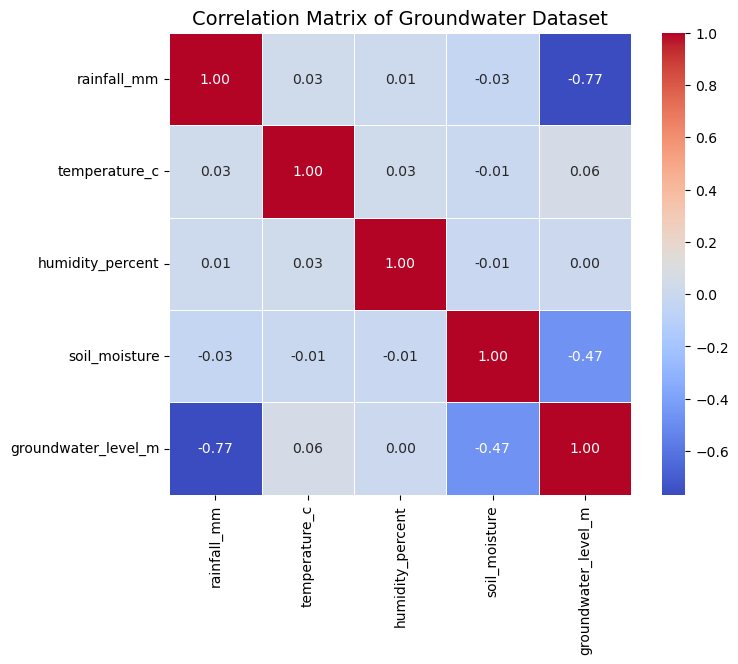

In [5]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Set figure size
plt.figure(figsize=(8, 6))

# Plot correlation heatmap
sns.heatmap(
    correlation_matrix,   # Correlation values
    annot=True,           # Show correlation values on heatmap
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # Color palette
    linewidths=0.5,       # Lines between cells
    square=True           # Make cells square
)

# Add title
plt.title("Correlation Matrix of Groundwater Dataset", fontsize=14)
plt.show()


In [6]:
# Features (independent variables)
X = df.drop("groundwater_level_m", axis=1)

# Target (dependent variable)
y = df["groundwater_level_m"]

# Print shapes
print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


Feature matrix X shape: (1000, 4)
Target vector y shape: (1000,)


In [7]:
# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X,              # Features
    y,              # Target
    test_size=0.2,  # 20% test data
    random_state=42 # Ensure reproducible results
)

# Verify the split
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (800, 4)
X_test shape : (200, 4)
y_train shape: (800,)
y_test shape : (200,)


In [8]:
# Standardize features (Linear Regression benefits from scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [10]:
lr_pred = lr_model.predict(X_test_scaled)


In [11]:
# Calculate metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = lr_mse ** 0.5
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Performance:")
print("RMSE:", round(lr_rmse, 3))
print("R² Score:", round(lr_r2, 3))


Linear Regression Performance:
RMSE: 1.539
R² Score: 0.827


In [12]:
rf_model = RandomForestRegressor(
    n_estimators=200,  # Number of trees
    random_state=42    # For reproducibility
)

# Train model on raw features (RF does not require scaling)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [13]:
rf_pred = rf_model.predict(X_test)


In [14]:
# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Performance:")
print("RMSE:", round(rf_rmse, 3))
print("R² Score:", round(rf_r2, 3))


Random Forest Performance:
RMSE: 1.657
R² Score: 0.799


In [15]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "RMSE": [lr_rmse, rf_rmse],
    "R2 Score": [lr_r2, rf_r2]
})

comparison


,Model,RMSE,R2 Score
0,Linear Regression,1.539354,0.826850
1,Random Forest,1.657000,0.799372


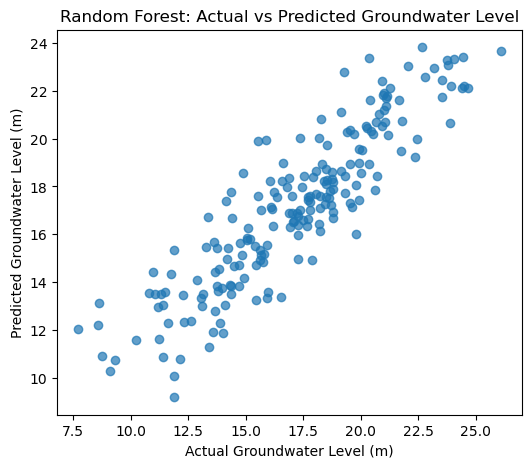

In [16]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.xlabel("Actual Groundwater Level (m)")
plt.ylabel("Predicted Groundwater Level (m)")
plt.title("Random Forest: Actual vs Predicted Groundwater Level")
plt.show()


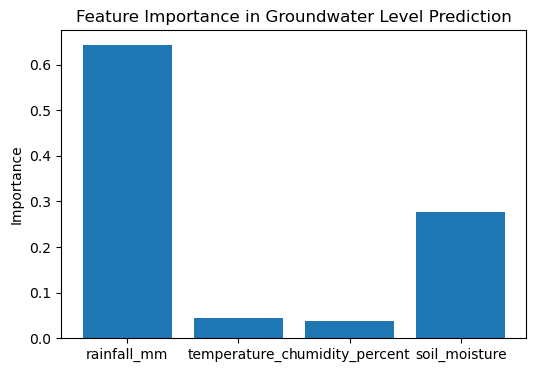

In [17]:
importance = rf_model.feature_importances_

plt.figure(figsize=(6,4))
plt.bar(X.columns, importance)
plt.title("Feature Importance in Groundwater Level Prediction")
plt.ylabel("Importance")
plt.show()


In [18]:
# Example new input: [rainfall_mm, temperature_c, humidity_percent, soil_moisture]
new_data = np.array([[120, 28, 85, 0.75]])

# Predict groundwater level
prediction = rf_model.predict(new_data)
print("Predicted Groundwater Level (m):", round(prediction[0], 2))


Predicted Groundwater Level (m): 15.55


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
